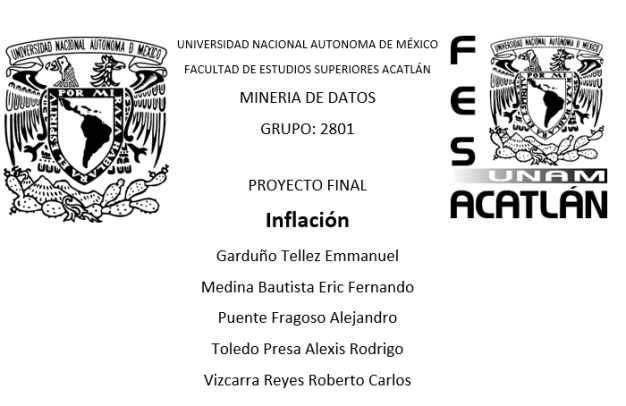


* **Entendimiento del caso de estudio:** 

La inflación ha sido bastante cambiante al rededor de los años, se quiere entender como ha sido este cambio desde los 60 hasta el 2020, y a su vez observar si se ha llegado a mantener en algún rango de años.

# Notebook preparation

## 0.Kaggle connection

Como paso principal debemos de subir los datos que obtuvimos de Kgle en formato .json 

In [ ]:
# subir el archivo kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"robertovizcarrareyes","key":"3ae33ecf9e7fb8fa60216712d5802048"}'}

Obtenemos permisaos para revisar que se haya listado nuestro archivo

In [ ]:
!pwd

/content


In [ ]:
!ls

 inflation_country_code.csv		    language_code_final.csv
 inflation-data-from-around-the-world.zip   sample_data
'kaggle (1).json'			    worldgoogletrendsinflation
 kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!ls ~ -la

total 60
drwx------ 1 root root 4096 May 25 02:48 .
drwxr-xr-x 1 root root 4096 May 25 02:46 ..
-r-xr-xr-x 1 root root 1169 Jan  1  2000 .bashrc
drwxr-xr-x 1 root root 4096 May 25 03:40 .cache
drwxr-xr-x 1 root root 4096 May 20 23:00 .config
drwxr-xr-x 5 root root 4096 May 20 23:00 .ipython
drwx------ 2 root root 4096 May 20 23:00 .jupyter
drwxr-xr-x 2 root root 4096 May 25 02:48 .kaggle
drwxr-xr-x 2 root root 4096 May 25 02:46 .keras
drwxr-xr-x 1 root root 4096 May 20 23:00 .local
drwxr-xr-x 4 root root 4096 May 20 23:00 .npm
-rw-r--r-- 1 root root  148 Aug 17  2015 .profile
-r-xr-xr-x 1 root root  254 Jan  1  2000 .tmux.conf


In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!ls ~/.kaggle/

kaggle.json


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d rogerdata/inflation-data-from-around-the-world

inflation-data-from-around-the-world.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

 inflation_country_code.csv		    language_code_final.csv
 inflation-data-from-around-the-world.zip   sample_data
'kaggle (1).json'			    worldgoogletrendsinflation
 kaggle.json


In [ ]:
!unzip -q inflation-data-from-around-the-world.zip -d .

replace ./inflation_country_code.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
!ls

 inflation_country_code.csv		    language_code_final.csv
 inflation-data-from-around-the-world.zip   sample_data
'kaggle (1).json'			    worldgoogletrendsinflation
 kaggle.json


In [ ]:
!head inflation_country_code.csv

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,5yr-mean,Alpha-2 Country Code,Lang1,ISO 639-1 Code,HL,inflation_translation
0,Aruba,ABW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,,,,,,,,,,,,,,,,,,,,,,,,,,4.03225805628625,1.07396640826832,3.64304545817704,3.12186849610724,3.99162804604573,5.83668775158168,5.55555555555579,3.87337536996478,5.21555996035712,6.3110797127044,3.36139107320895,3.22528797213981,2.99994809778411,1.8694885361554,2.28037198258756,4.04402131190514,2.8836043031626,3.31524678585428,3.65636507938414,2.52912946932762,3.39778677828806,3.60802438784541,5.39256784475512,8.9559870517779,-2.13542872046934,2.07814071860782,4.31629742195207,0.627471992893

# 1.Know your data

## Import libraries

Importamos las librerias necesarias, cada una nos será de utilidad para el manejo de los datos y su graficación



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno

from pandas.api.types import is_string_dtype, is_numeric_dtype

In [ ]:
data = pd.read_csv('inflation_country_code.csv')

In [ ]:
type(data)

pandas.core.frame.DataFrame

Creamos nustro Data Frame de 5 x 72, como podemos ver existen datos que se toman como NaN pero posteriormente nos encargaremos de esto 

In [ ]:
data.head()

,Unnamed: 0,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2017,2018,2019,2020,5yr-mean,Alpha-2 Country Code,Lang1,ISO 639-1 Code,HL,inflation_translation
0,0,Aruba,ABW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,...,-1.028282,3.626041,4.257462,NaN,1.481006,AW,Dutch,nl,nl-AW,Inflatie
1,1,Afghanistan,AFG,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,...,4.975952,0.626149,2.302373,NaN,3.072091,AF,Pashto,ps,ps-AF,انفلاسیون
2,2,Angola,AGO,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,...,29.843587,19.628608,17.081215,NaN,24.312181,AO,Portuguese,pt,pt-AO,Inflação
3,3,Albania,ALB,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,...,1.986661,2.028060,1.411091,NaN,1.675311,AL,Albanian,sq,sq-AL,Inflacion
4,4,Albania,ALB,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,...,1.986661,2.028060,1.411091,NaN,1.675311,AL,Albanian,sq,sq-AL,Inflacion


## Copy data

Creamos una copia de los datos para no modifcar los originales y en todo caso volver a ellos. Verificaremos que tipo de dato  maneja (entero, flotante,etc)

In [ ]:
df = data.copy()
df.head()

,Unnamed: 0,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2017,2018,2019,2020,5yr-mean,Alpha-2 Country Code,Lang1,ISO 639-1 Code,HL,inflation_translation
0,0,Aruba,ABW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,...,-1.028282,3.626041,4.257462,NaN,1.481006,AW,Dutch,nl,nl-AW,Inflatie
1,1,Afghanistan,AFG,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,...,4.975952,0.626149,2.302373,NaN,3.072091,AF,Pashto,ps,ps-AF,انفلاسیون
2,2,Angola,AGO,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,...,29.843587,19.628608,17.081215,NaN,24.312181,AO,Portuguese,pt,pt-AO,Inflação
3,3,Albania,ALB,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,...,1.986661,2.028060,1.411091,NaN,1.675311,AL,Albanian,sq,sq-AL,Inflacion
4,4,Albania,ALB,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,...,1.986661,2.028060,1.411091,NaN,1.675311,AL,Albanian,sq,sq-AL,Inflacion


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 72 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             243 non-null    int64  
 1   Country Name           243 non-null    object 
 2   Country Code           243 non-null    object 
 3   Indicator Name         243 non-null    object 
 4   Indicator Code         243 non-null    object 
 5   1960                   73 non-null     float64
 6   1961                   75 non-null     float64
 7   1962                   77 non-null     float64
 8   1963                   79 non-null     float64
 9   1964                   84 non-null     float64
 10  1965                   89 non-null     float64
 11  1966                   96 non-null     float64
 12  1967                   102 non-null    float64
 13  1968                   102 non-null    float64
 14  1969                   103 non-null    float64
 15  1970  

Volvemos a imprimir un Data Frame pero con los datos filtrados. Posteriormente graficamos para ver el comportamiento para ver su comportamiento

In [ ]:
data.describe()

,Unnamed: 0,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,5yr-mean
count,243.000000,73.000000,75.000000,77.000000,79.000000,84.000000,89.000000,96.000000,102.000000,102.000000,...,211.000000,210.000000,208.000000,206.000000,205.000000,205.000000,200.000000,194.000000,185.000000,205.000000
mean,121.000000,3.532042,3.651996,4.567294,5.841344,6.210827,8.089417,17.581914,5.116923,5.918304,...,6.310148,5.468870,3.976874,3.728338,3.551370,6.229866,4.790320,3.731715,3.205137,6.171206
std,70.292247,6.777108,4.786287,14.960519,16.643370,13.465494,32.844442,115.686097,14.116624,18.263148,...,6.484618,6.994756,5.416718,6.675482,10.560509,32.114611,13.941694,5.723492,5.749583,26.748539
min,0.000000,-5.030042,-3.900000,-3.846154,-2.694655,-4.535654,-3.878976,-1.361868,-8.422486,-10.033895,...,-0.400041,-3.045863,-4.294873,-1.509245,-30.243160,-3.092990,-1.537100,-2.814698,-3.233389,-0.625258
25%,60.500000,0.697929,1.221042,0.895947,1.819428,1.823234,1.785566,2.359727,1.215841,1.012352,...,3.165656,2.389774,1.216776,0.530485,0.118627,0.183335,1.266986,1.291544,0.758132,1.032004
50%,121.000000,1.945765,2.155173,2.662064,2.946154,3.211192,3.397490,3.804520,2.751544,2.458418,...,4.524212,3.634945,2.478394,2.169980,1.437025,1.411939,2.141723,2.327554,1.839545,1.899279
75%,181.500000,4.141779,3.882663,4.697094,5.574203,5.206618,4.930906,7.105625,4.304572,4.646440,...,7.595906,6.081773,5.544030,4.711621,4.437371,4.086823,4.478909,4.076398,3.447502,4.424343
max,242.000000,39.590444,22.747264,131.397849,145.910781,108.994709,306.763110,1136.254112,106.000000,128.843042,...,53.228698,59.219736,40.639428,62.168650,121.738085,379.848021,187.851626,63.292507,50.994052,283.849823


In [ ]:
df.isnull().sum()

Unnamed: 0               0
Country Name             0
Country Code             0
Indicator Name           0
Indicator Code           0
                        ..
Alpha-2 Country Code     0
Lang1                    0
ISO 639-1 Code           0
HL                       0
inflation_translation    0
Length: 72, dtype: int64

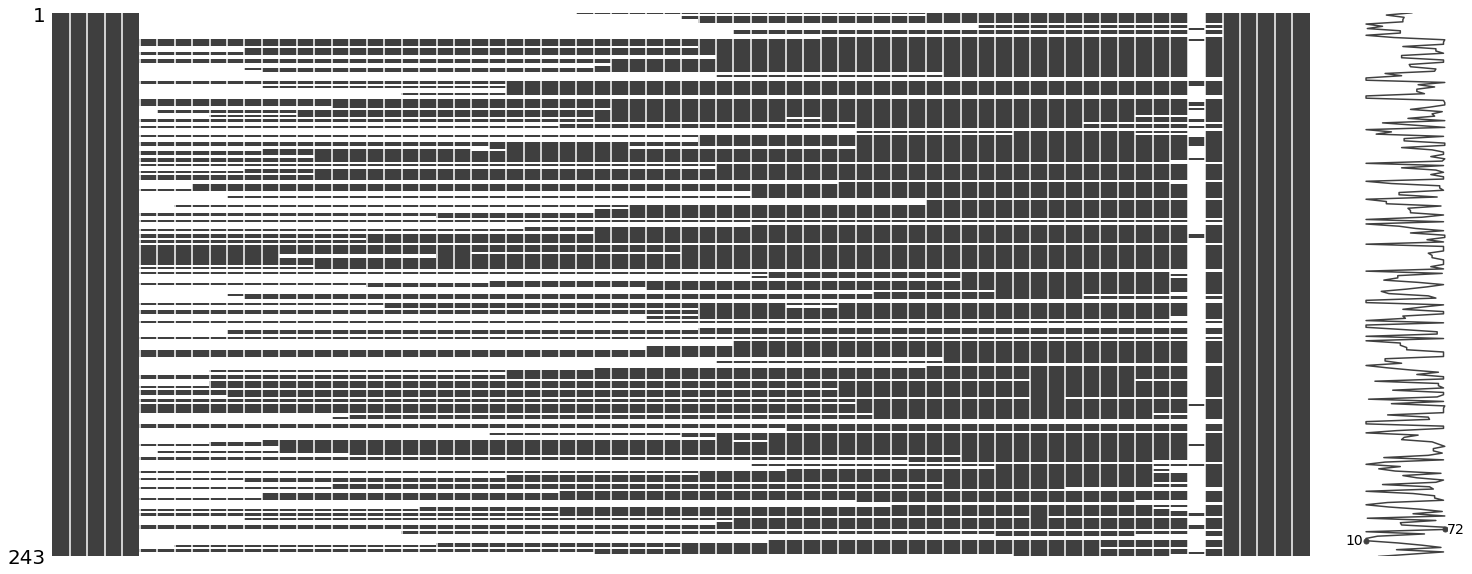

In [ ]:
msno.matrix(df)

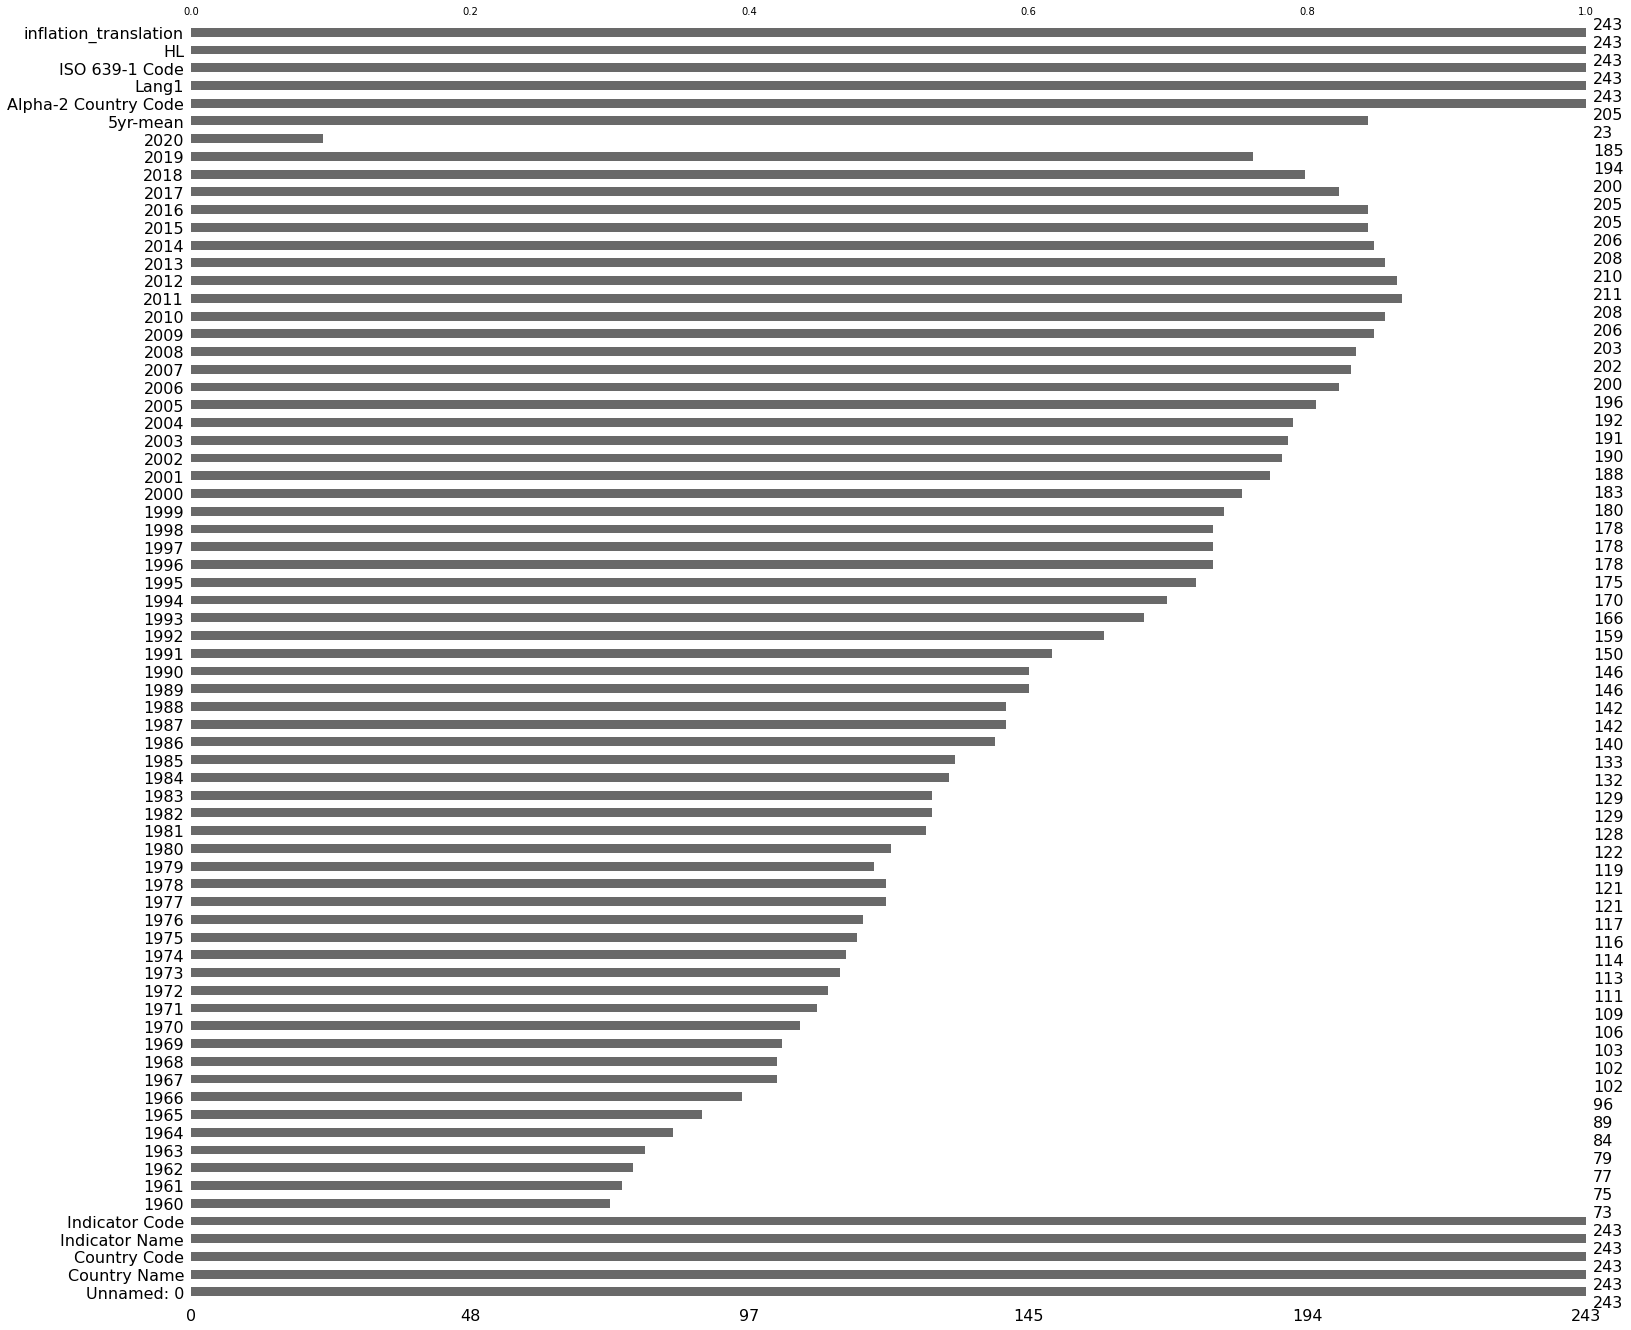

In [ ]:
msno.bar(df)

In [ ]:
df = df.fillna(0)

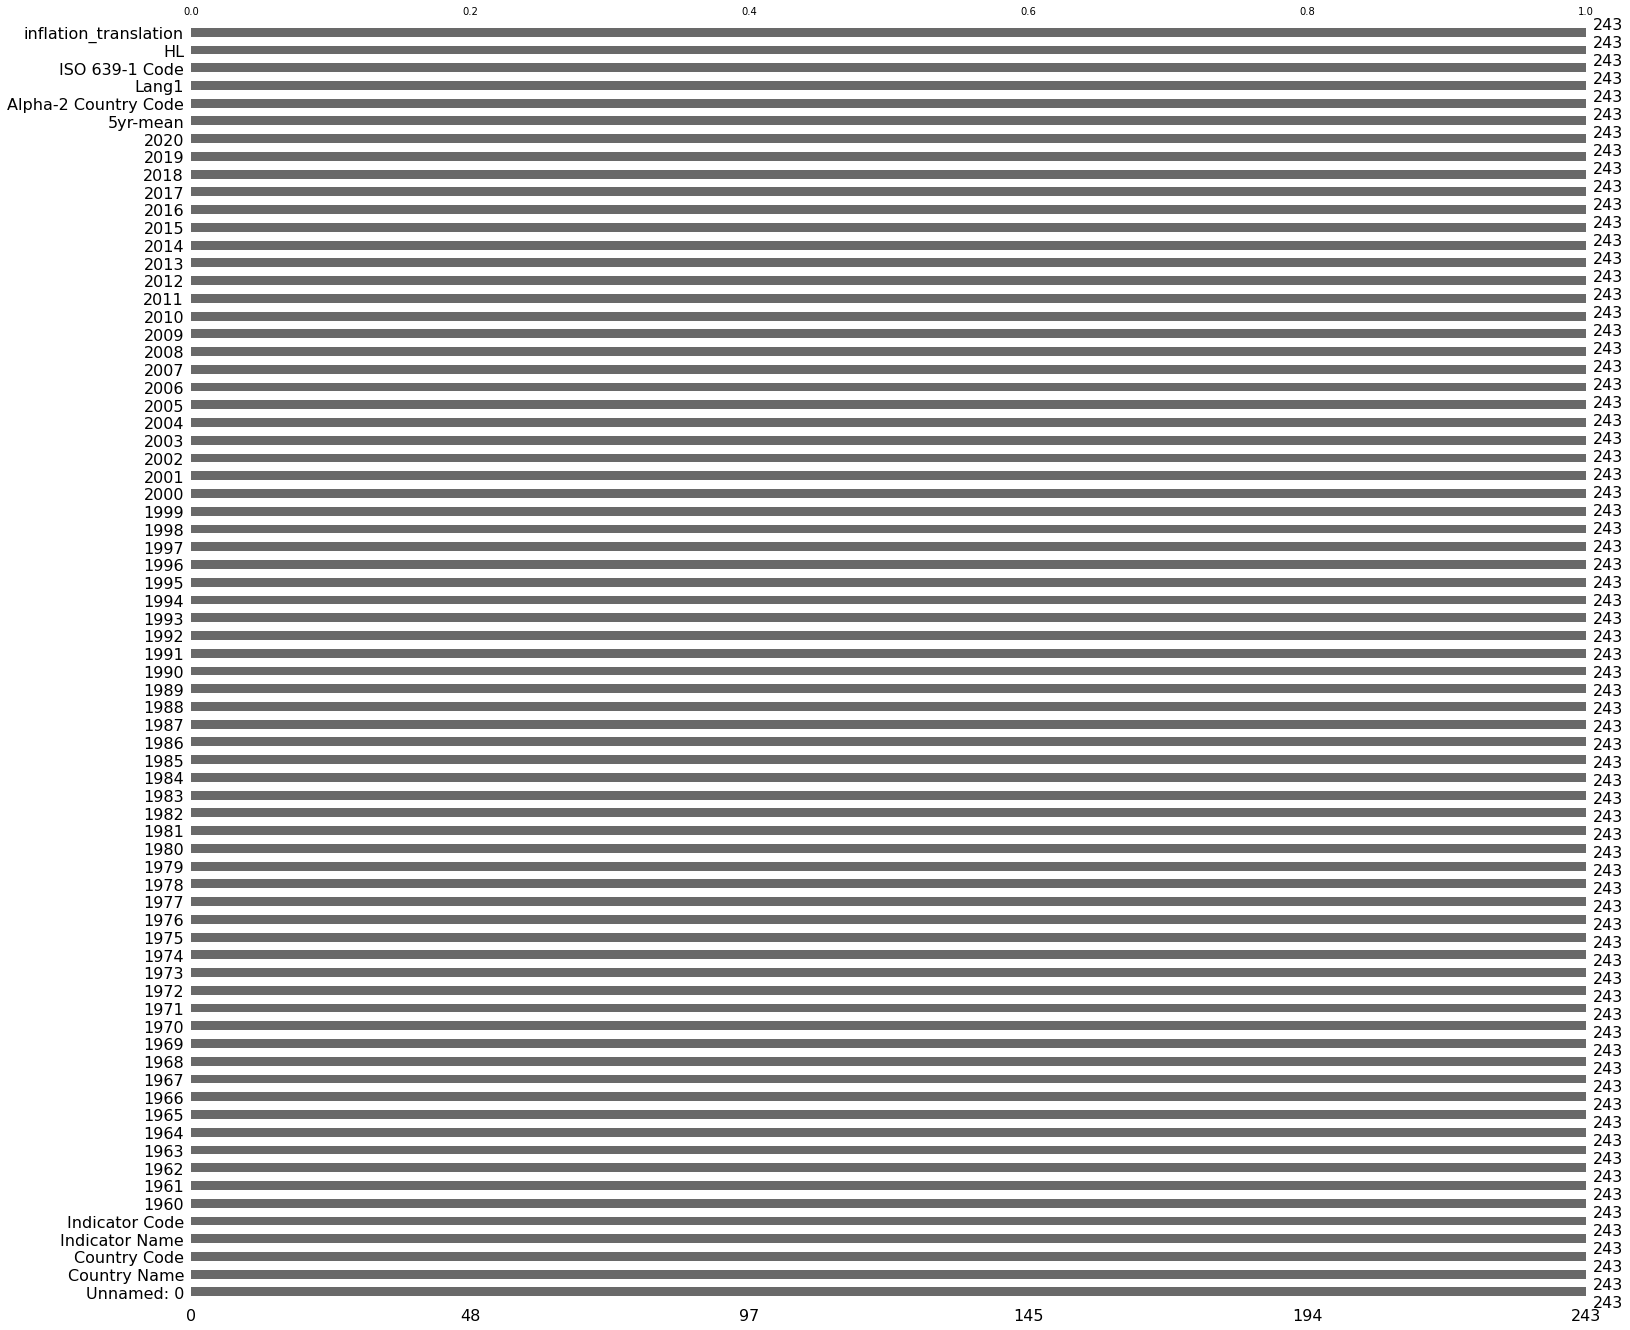

In [ ]:
msno.bar(df)

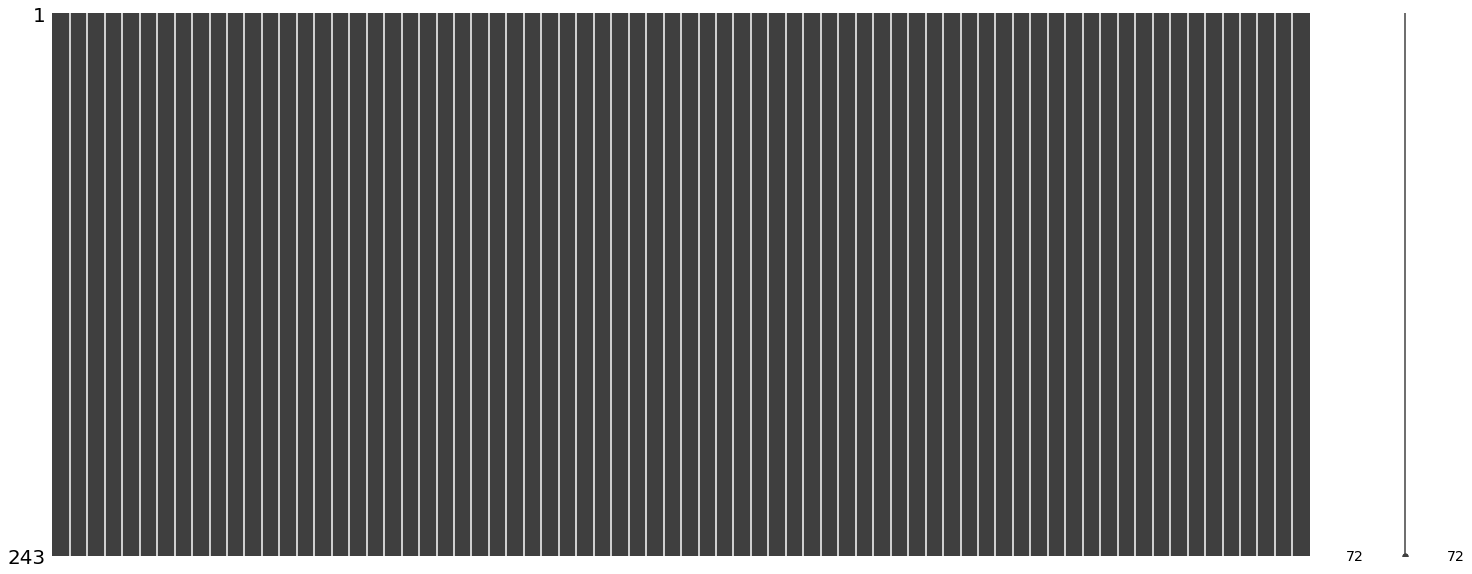

In [ ]:
msno.matrix(df)

In [ ]:
df.head()

,Unnamed: 0,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2017,2018,2019,2020,5yr-mean,Alpha-2 Country Code,Lang1,ISO 639-1 Code,HL,inflation_translation
0,0,Aruba,ABW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,0.0,0.0,0.0,0.0,0.0,...,-1.028282,3.626041,4.257462,0,1.481006,AW,Dutch,nl,nl-AW,Inflatie
1,1,Afghanistan,AFG,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,0.0,0.0,0.0,0.0,0.0,...,4.975952,0.626149,2.302373,0,3.072091,AF,Pashto,ps,ps-AF,انفلاسیون
2,2,Angola,AGO,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,0.0,0.0,0.0,0.0,0.0,...,29.843587,19.628608,17.081215,0,24.312181,AO,Portuguese,pt,pt-AO,Inflação
3,3,Albania,ALB,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,0.0,0.0,0.0,0.0,0.0,...,1.986661,2.028060,1.411091,0,1.675311,AL,Albanian,sq,sq-AL,Inflacion
4,4,Albania,ALB,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,0.0,0.0,0.0,0.0,0.0,...,1.986661,2.028060,1.411091,0,1.675311,AL,Albanian,sq,sq-AL,Inflacion


# 2.Feature engineering 

Realizaremos un vistazo rapido a los para determinar cuantas columnas nos seran utiles y tambien veremos el numero de paises que tenemos.

In [ ]:
df.columns

Index(['Unnamed: 0', 'Country Name', 'Country Code', 'Indicator Name',
       'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965',
       '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974',
       '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '5yr-mean', 'Alpha-2 Country Code', 'Lang1', 'ISO 639-1 Code',
       'HL', 'inflation_translation'],
      dtype='object')

In [ ]:
df['Country Name']

0             Aruba
1       Afghanistan
2            Angola
3           Albania
4           Albania
           ...     
238           Samoa
239     Yemen, Rep.
240    South Africa
241          Zambia
242        Zimbabwe
Name: Country Name, Length: 243, dtype: object

## Eliminacion de variables redundantes 



In [ ]:
df.drop(columns = ['5yr-mean','Country Code', 'Indicator Code','Unnamed: 0', 'Indicator Name', 'Alpha-2 Country Code', 'Lang1', 'ISO 639-1 Code', 'HL', 'inflation_translation'], axis=1, inplace=True)

Al final eliminamos 10 columnas.
Nos quedamos con los años y el nombre de los paises

In [ ]:
df.columns

Index(['Country Name', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

Visualizamos nuevamente la informacion. Con la funcion .head() tenemos una vista de los primeros elementos de nuestro conjunto de datos y con la funcion .tail() una vista de los ultimos.

In [ ]:
df.head()
df.tail()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
238,Samoa,0.000000,0.000000,2.654867,0.689655,5.308219,2.113821,2.866242,-0.515996,1.711618,...,5.235416,2.049019,0.610086,-0.406816,0.724470,1.304719,1.749897,4.197459,0.982327,0
239,"Yemen, Rep.",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19.543562,9.885387,10.968442,8.104726,0.000000,0.000000,0.000000,0.000000,0.000000,0
240,South Africa,1.288878,2.102343,1.246290,1.337968,2.534980,4.069023,3.489250,3.538966,1.986128,...,5.017158,5.723944,5.776404,6.136020,4.509208,6.594604,5.181082,4.504577,4.124351,0
241,Zambia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.429397,6.575900,6.977676,7.806876,10.110593,17.869730,6.577312,7.494572,9.150316,13.9
242,Zimbabwe,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.466130,3.725327,1.634950,-0.197785,-2.430968,-1.543670,0.893962,10.618866,0.000000,0


Realizamos un .describe() y vemos informacion rapida de nuestros datos restantes

In [ ]:
df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,...,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,1.061066,1.127159,1.447250,1.899038,2.146953,2.962791,6.945941,2.147844,2.484226,1.815859,...,3.604857,5.479182,4.726184,3.404073,3.160649,2.996012,5.255648,3.942650,2.979229,2.440125
std,4.037027,3.140501,8.650076,9.838653,8.423129,20.187305,72.992783,9.464336,12.156153,3.335003,...,3.907178,6.407943,6.766046,5.201465,6.288921,9.781769,29.572661,12.774574,5.326966,5.197040
min,-5.030042,-3.900000,-3.846154,-2.694655,-4.535654,-3.878976,-1.361868,-8.422486,-10.033895,-4.339051,...,-3.899550,-0.400041,-3.045863,-4.294873,-1.509245,-30.243160,-3.092990,-1.537100,-2.814698,-3.233389
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.041018,2.336801,1.484556,0.507078,0.000000,0.000000,0.000000,0.505832,0.374383,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.517851,3.919286,3.026964,2.000159,1.605804,0.744199,0.891592,1.759857,1.912959,1.238699
75%,0.195854,0.862758,0.570450,1.598578,1.870349,2.298300,3.115910,1.977742,2.058261,2.956420,...,5.558913,6.579471,5.675172,4.931516,4.403803,3.982013,3.524489,3.829735,3.485823,2.829643
max,39.590444,22.747264,131.397849,145.910781,108.994709,306.763110,1136.254112,106.000000,128.843042,20.966667,...,28.187465,53.228698,59.219736,40.639428,62.168650,121.738085,379.848021,187.851626,63.292507,50.994052


## Country name -> Country_name_length


In [ ]:
df['Country Name']

0             Aruba
1       Afghanistan
2            Angola
3           Albania
4           Albania
           ...     
238           Samoa
239     Yemen, Rep.
240    South Africa
241          Zambia
242        Zimbabwe
Name: Country Name, Length: 243, dtype: object

In [ ]:
type(df['Country Name'])

pandas.core.series.Series

Resultara mas comodo trabajar con la longitud del nombre en lugar de el nombre mismo. Entonces creamos una nueva columna en la que se guarda el tamaño de la cadena de caracteres que correcponde al nombre de cada pais.

In [ ]:
df['Country_Name_Length'] = df['Country Name'].apply(len)
df['Country_Name_Length'].head()

0     5
1    11
2     6
3     7
4     7
Name: Country_Name_Length, dtype: int64

Ahora nos sobra la columna del nombre, asi que es eliminada

In [ ]:
df.drop(columns=['Country Name'], axis=1, inplace=True)

Se decide eliminar la columna correspondiente al año 2020 porque tiene demasiados datos nulos.

In [ ]:
df.drop(columns=['2020'], axis=1, inplace=True)

Separamos nuestras columnas por tipo, numericas o categoricas. Tenemos la suerte de que solo tenemos variables de tipo numerico.

In [ ]:
numerical = []
categorical = []

for column in df:
  if is_numeric_dtype(df[column]):
    numerical.append(column)

  elif is_string_dtype(df[column]):
    categorical.append(column)

print('numerical variables', numerical)
print('Categorical variables', categorical)

numerical variables ['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', 'Country_Name_Length']
Categorical variables []


# 3.Transformations

Antes de realizar la transformacion creamos una copia para tener un check point en caso de cometer errores

In [ ]:
df1 = df.copy()
df1.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Country_Name_Length
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.316297,0.627472,-2.372065,0.421441,0.474764,-0.931196,-1.028282,3.626041,4.257462,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.804186,6.441213,7.385772,4.673996,-0.661709,4.383892,4.975952,0.626149,2.302373,11
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.482468,10.277905,8.777814,7.280387,9.150372,30.695313,29.843587,19.628608,17.081215,6
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.429123,2.031596,1.937618,1.625865,1.896174,1.275432,1.986661,2.028060,1.411091,7
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.429123,2.031596,1.937618,1.625865,1.896174,1.275432,1.986661,2.028060,1.411091,7


Tenemos datos que se alejan mucho entre si, entonces vamos a realizar un MaxMin, asi ajustaremos tosdos nuestros valores en un rango desde el 0 al 1. Comenzamos importando la libreria MinMaxScaler y creando el objeto "scaler"

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler

A continuacion se aplica MaxMin a cada columna con un bucle

In [ ]:
for column in df1:
  scaler = MinMaxScaler()
  df1[column] = scaler.fit_transform(df[[column]])

Ahora podemos observar que nuestros datos estan dentro del rango deseado

In [ ]:
df1.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Country_Name_Length
0,0.112729,0.146356,0.028439,0.018133,0.039951,0.012487,0.001197,0.073609,0.07225,0.171465,...,0.087944,0.058995,0.042792,0.030320,0.202117,0.005645,0.002687,0.097429,0.138138,0.038462
1,0.112729,0.146356,0.028439,0.018133,0.039951,0.012487,0.001197,0.073609,0.07225,0.171465,...,0.227569,0.152365,0.259949,0.097102,0.194639,0.019525,0.034390,0.052050,0.102084,0.269231
2,0.112729,0.146356,0.028439,0.018133,0.039951,0.012487,0.001197,0.073609,0.07225,0.171465,...,0.258863,0.213983,0.290929,0.138033,0.259200,0.088234,0.165695,0.339499,0.374619,0.076923
3,0.112729,0.146356,0.028439,0.018133,0.039951,0.012487,0.001197,0.073609,0.07225,0.171465,...,0.071401,0.081545,0.138702,0.049234,0.211469,0.011408,0.018606,0.073256,0.085648,0.115385
4,0.112729,0.146356,0.028439,0.018133,0.039951,0.012487,0.001197,0.073609,0.07225,0.171465,...,0.071401,0.081545,0.138702,0.049234,0.211469,0.011408,0.018606,0.073256,0.085648,0.115385


# 4.Univariate analysis

## Numerical vs Numerical

Ya que solo tenemos datos de tipo numérico podemos hacer distintos tipos de graficos en los que podamos observar como se comporta la información.

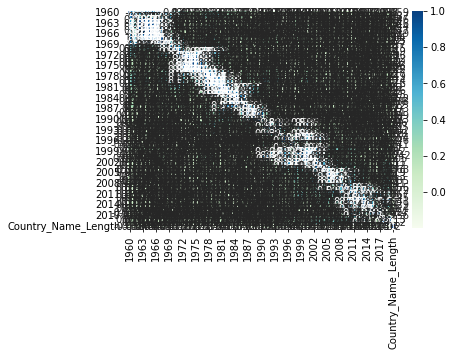

In [ ]:
# numerical vs numerical → heatmap
correlation = df1.corr()
sns.heatmap(correlation, cmap='GnBu', annot=True)

Sin embargo no se puede hacer un análisis numérico x númerico. Ya que el modelo contiene demasiadas columnas.

Por esta razón es más fácil hacer un analisis por año, en el que podremos ver como se agrupa la información.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

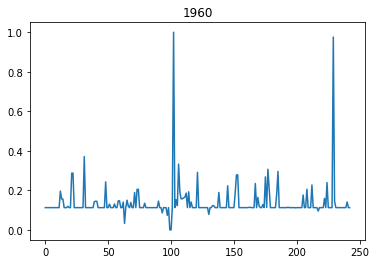

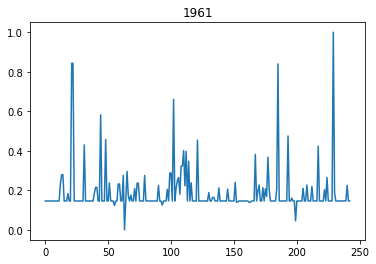

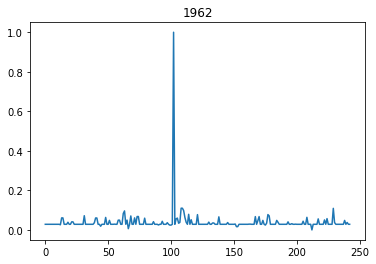

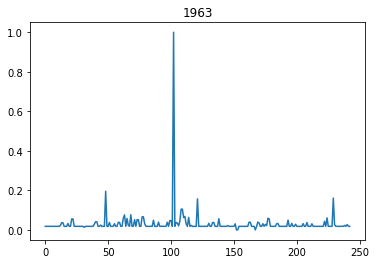

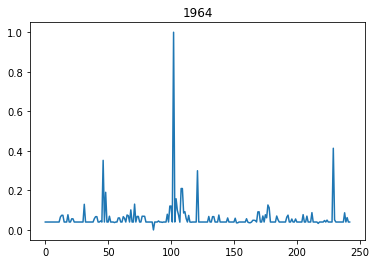

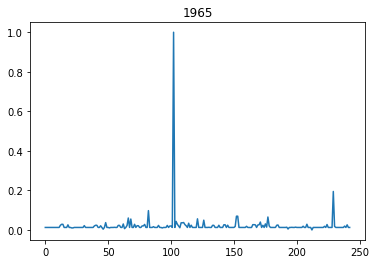

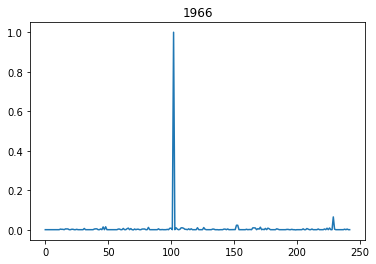

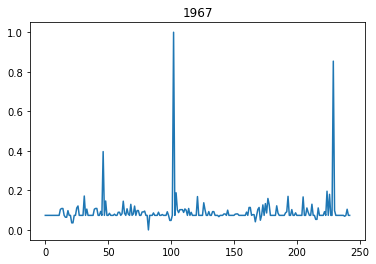

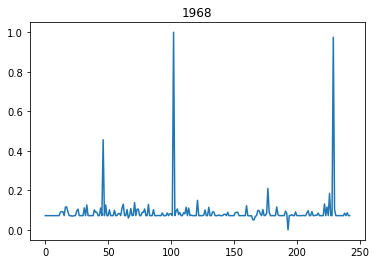

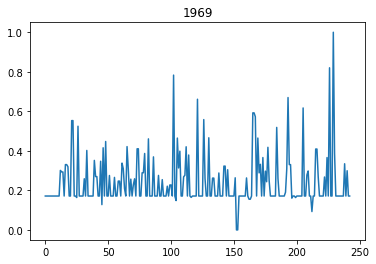

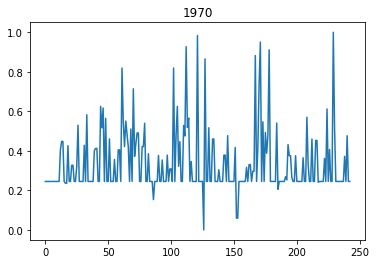

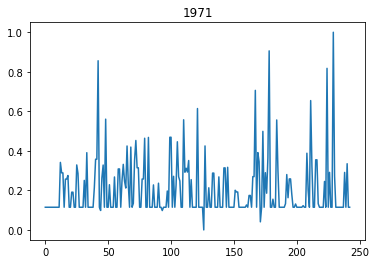

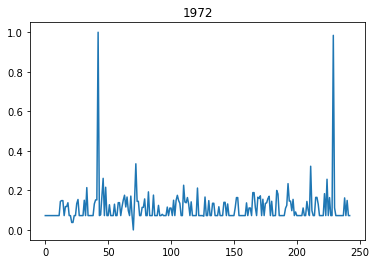

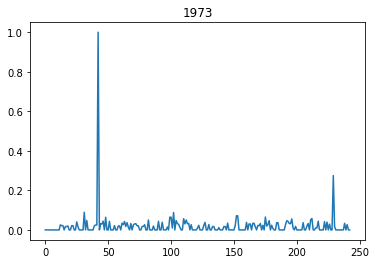

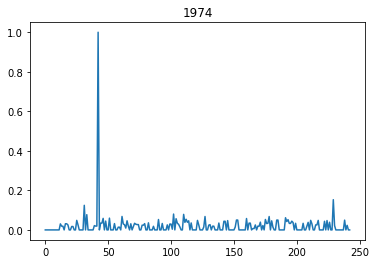

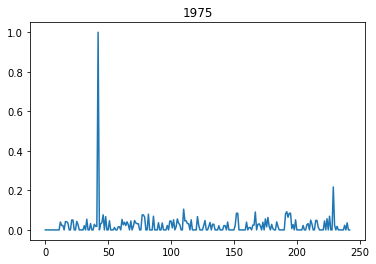

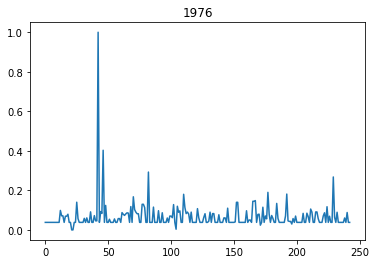

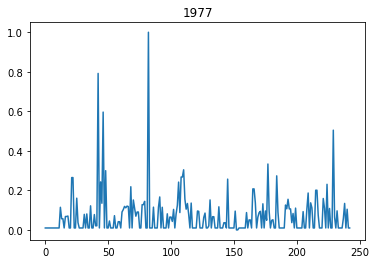

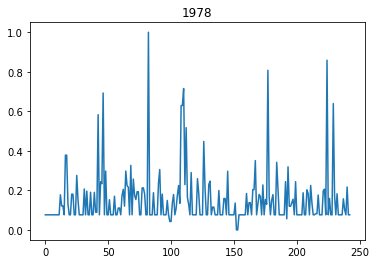

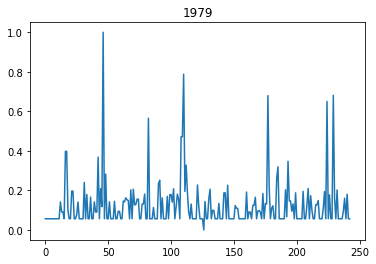

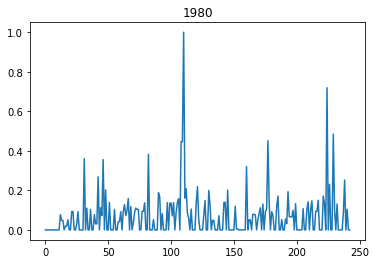

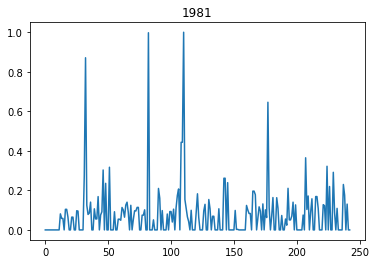

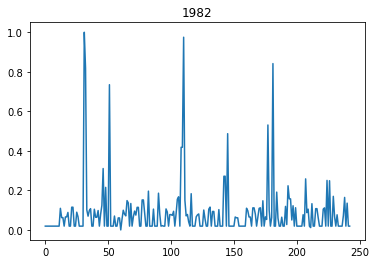

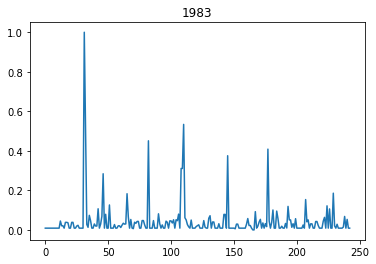

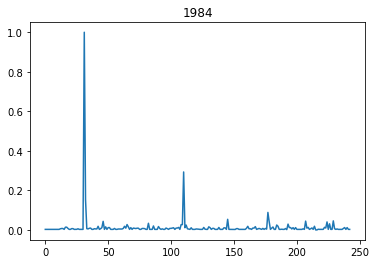

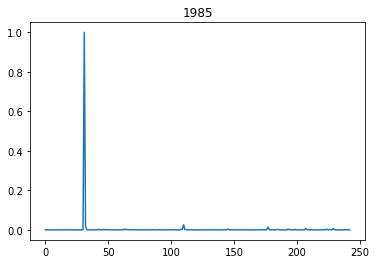

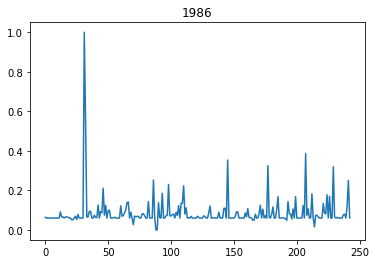

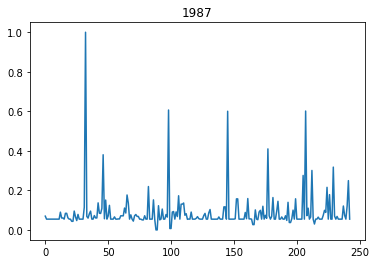

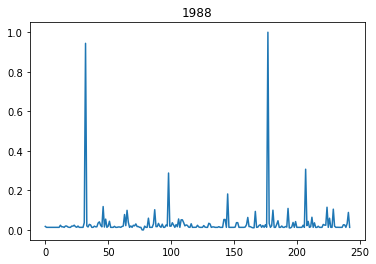

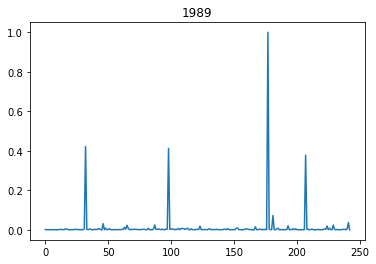

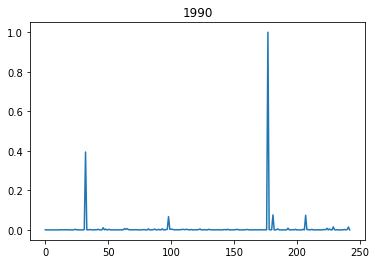

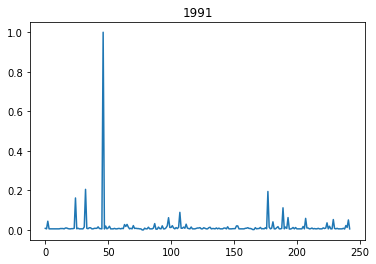

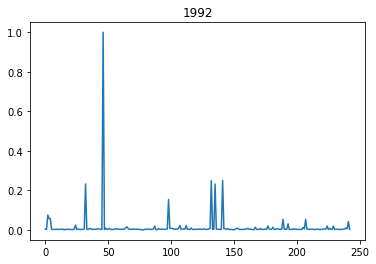

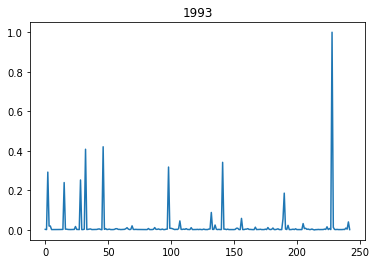

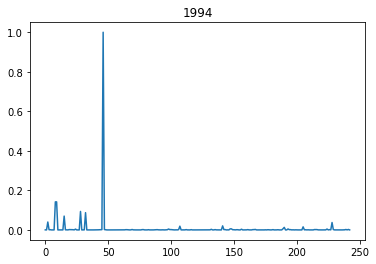

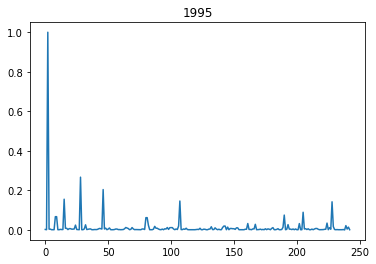

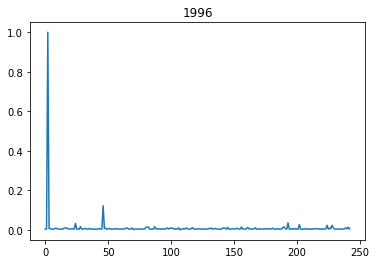

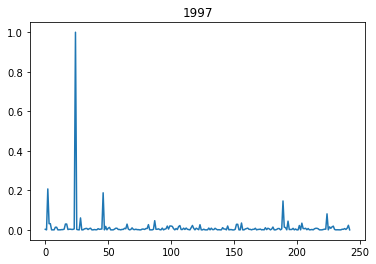

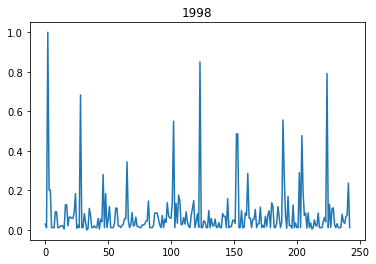

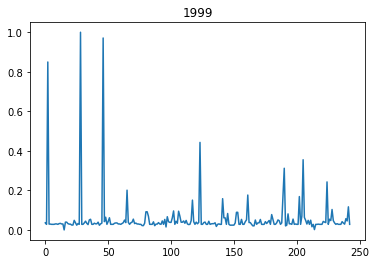

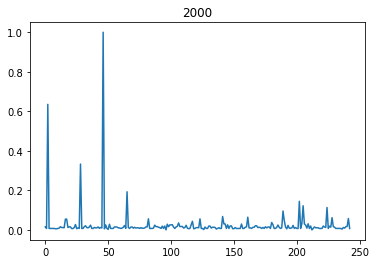

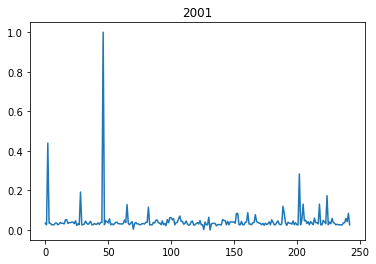

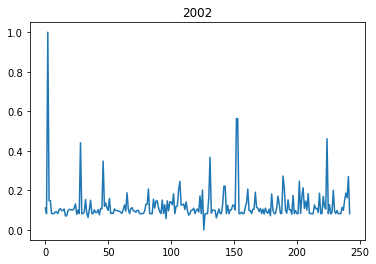

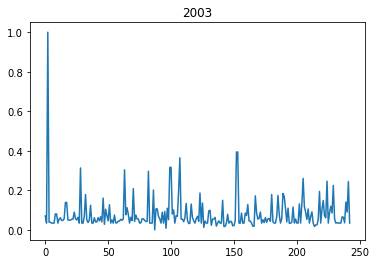

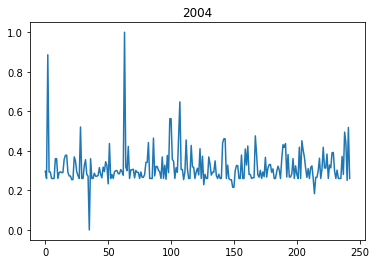

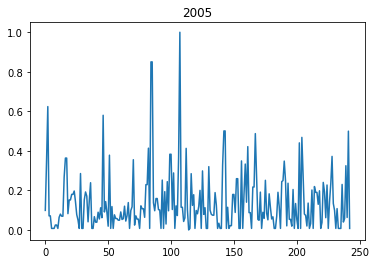

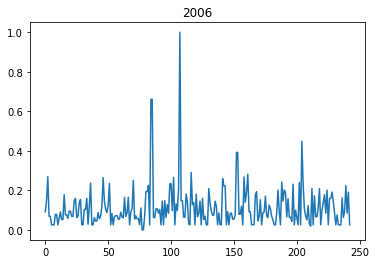

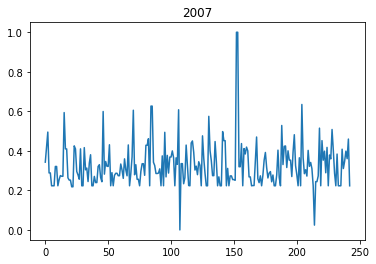

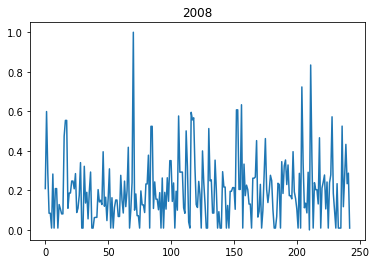

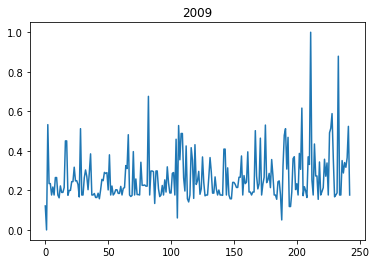

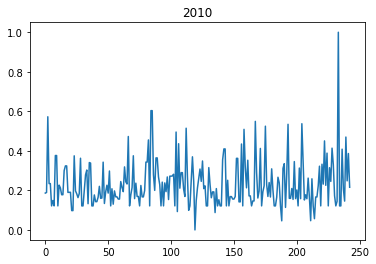

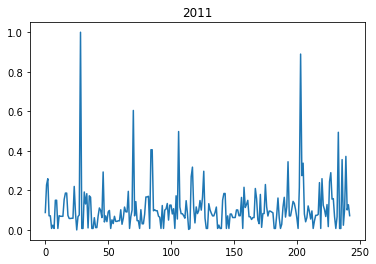

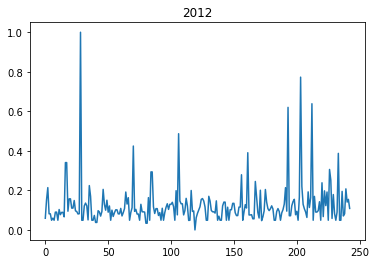

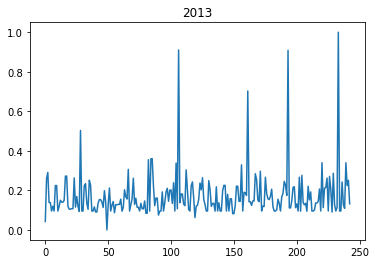

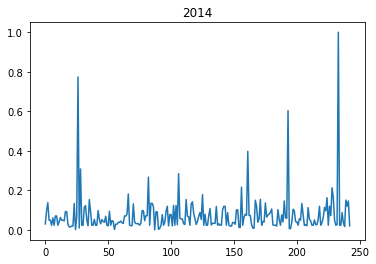

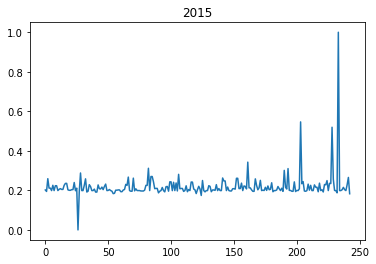

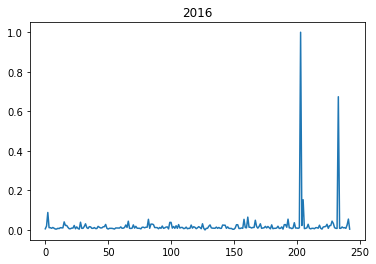

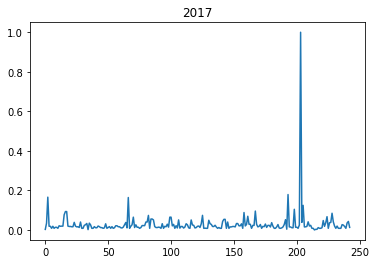

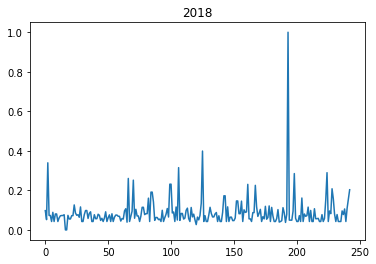

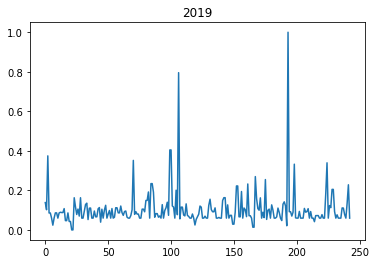

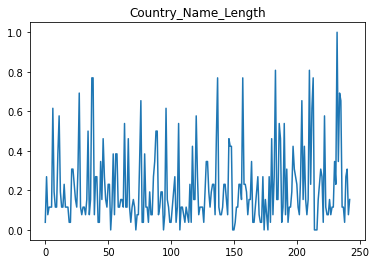

In [ ]:
for column in df1:
  plt.figure(column)
  plt.title(column)

  # numerical variables → histogram
  if column in numerical1:
    df1[column].plot(kind='line')

También podemos ver la densidad por año dentro de las gráficas en este tipo de analisis.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

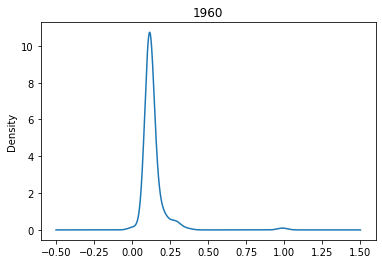

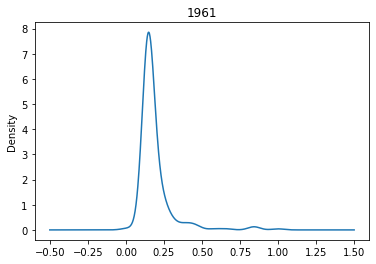

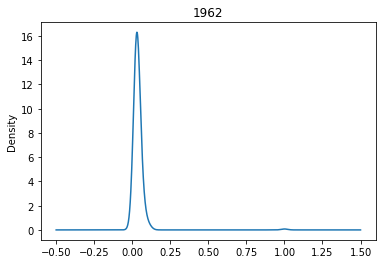

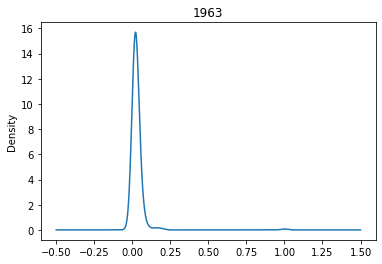

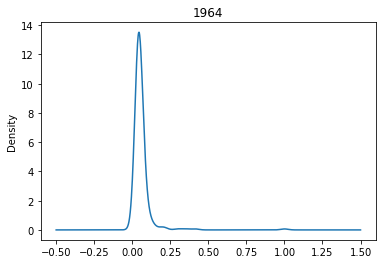

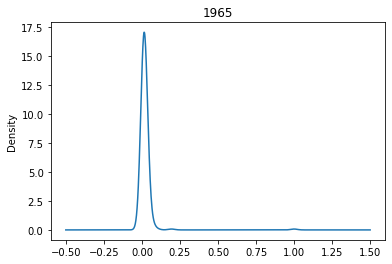

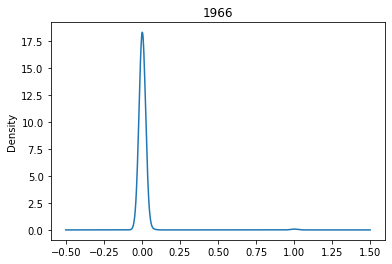

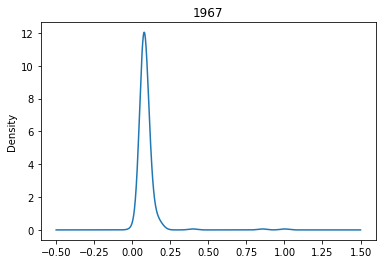

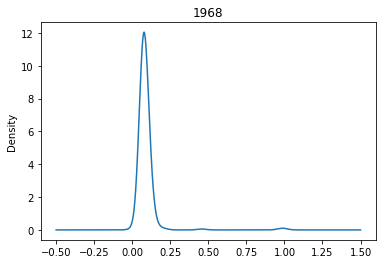

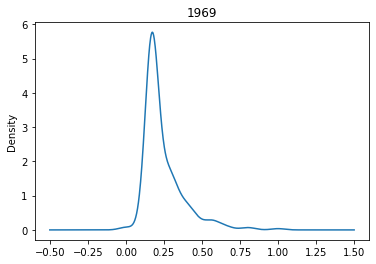

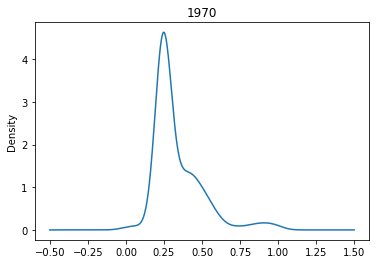

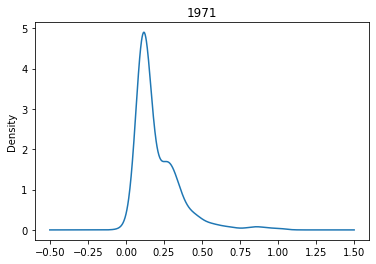

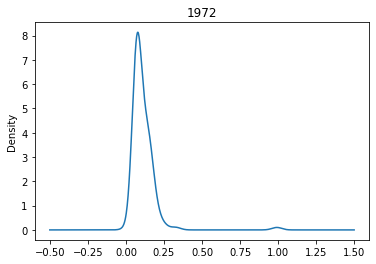

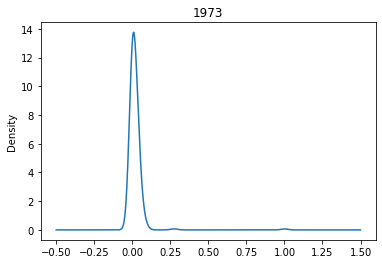

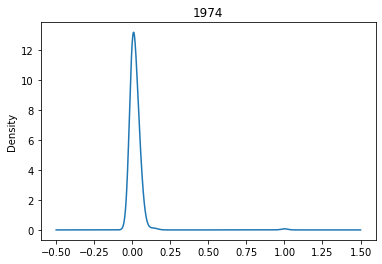

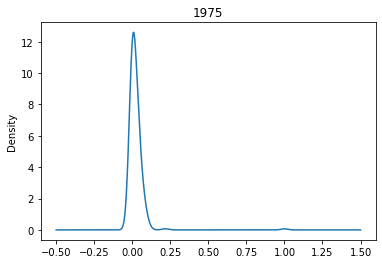

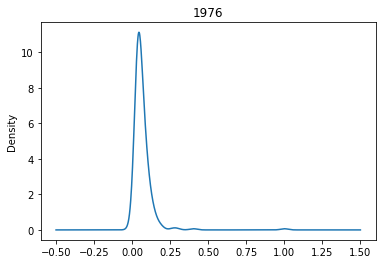

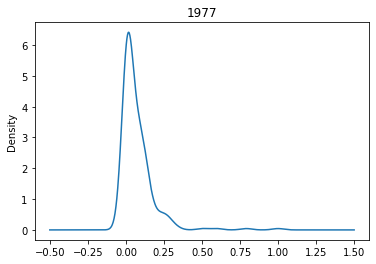

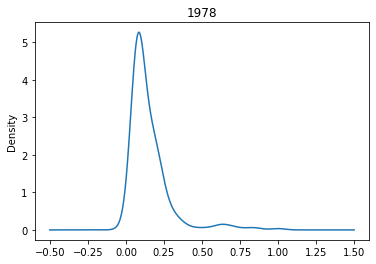

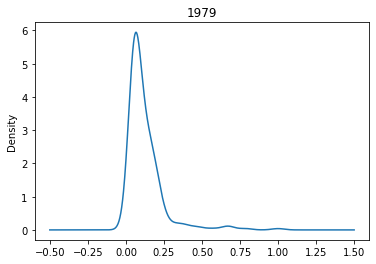

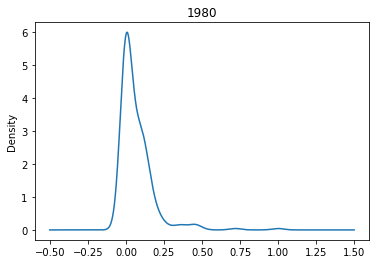

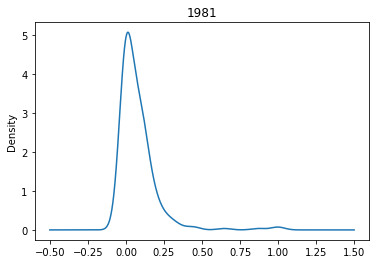

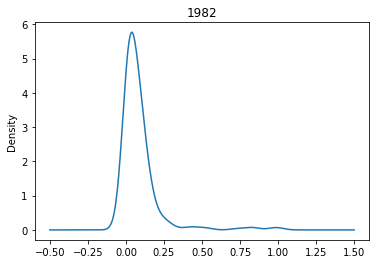

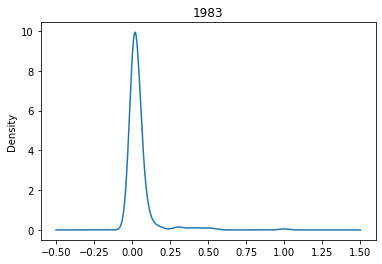

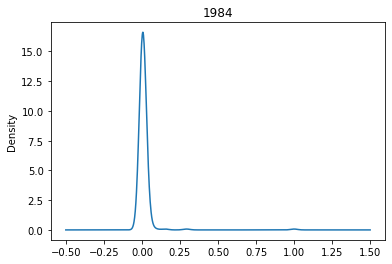

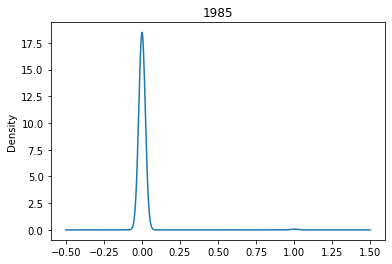

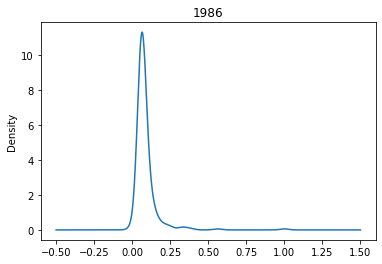

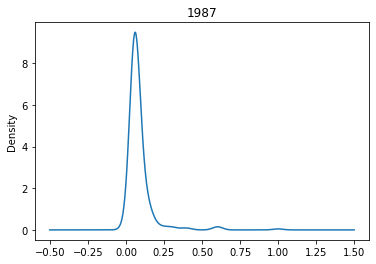

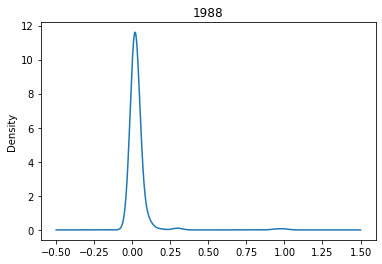

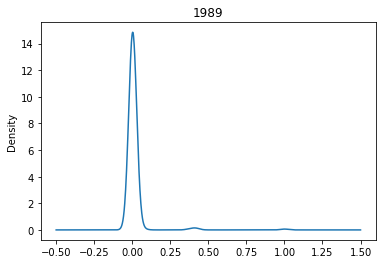

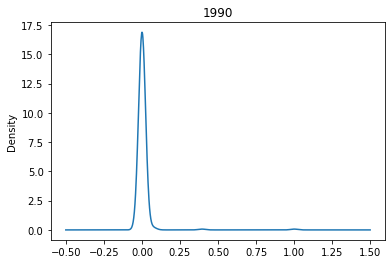

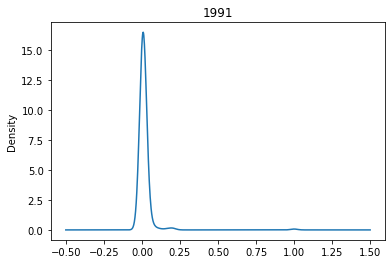

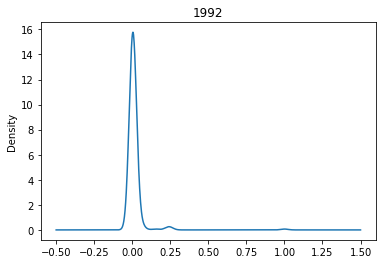

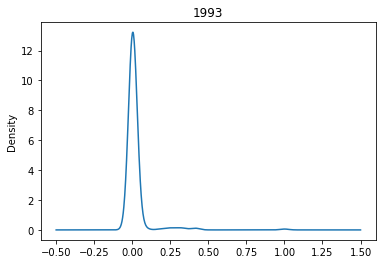

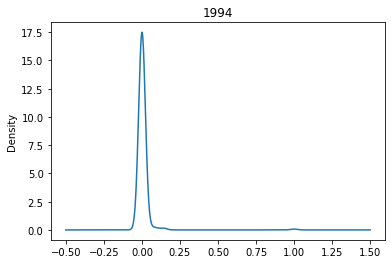

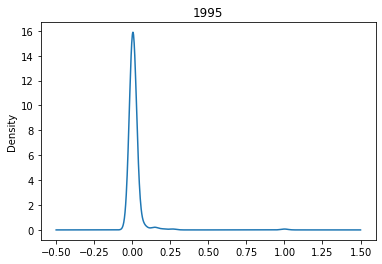

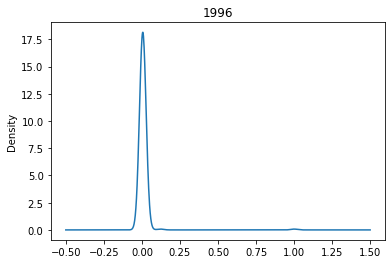

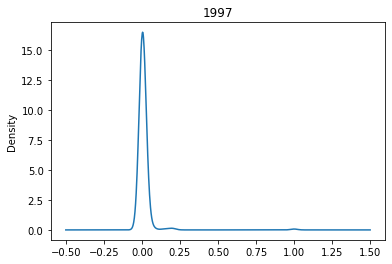

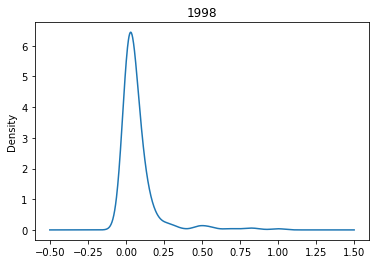

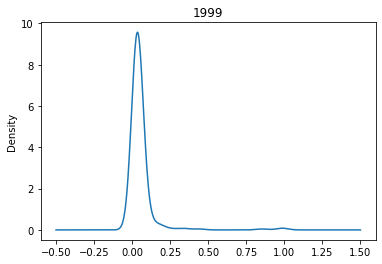

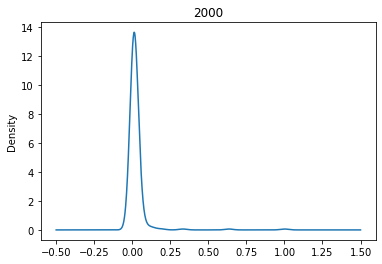

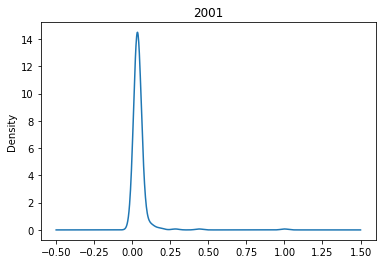

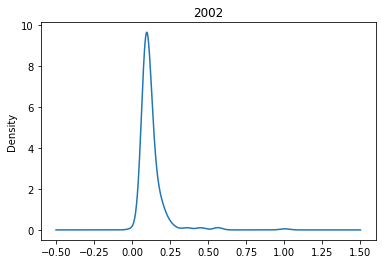

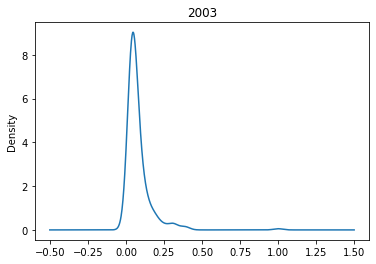

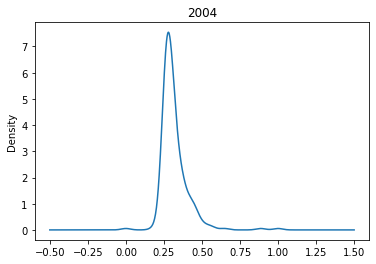

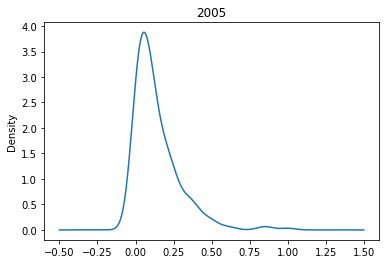

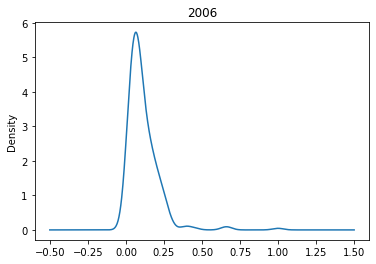

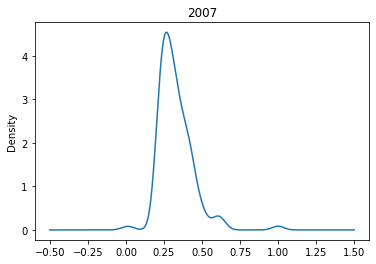

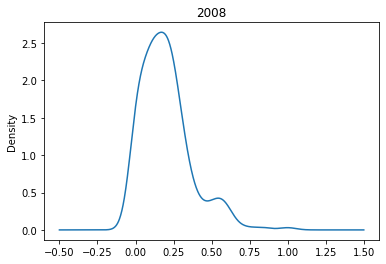

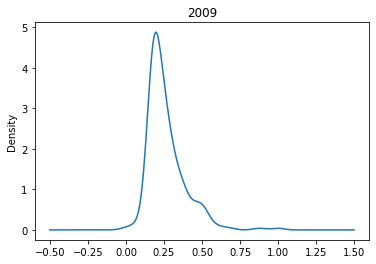

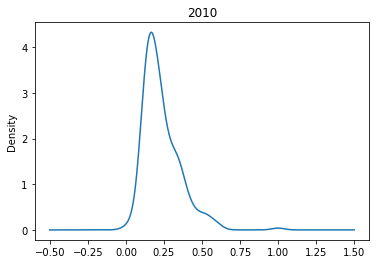

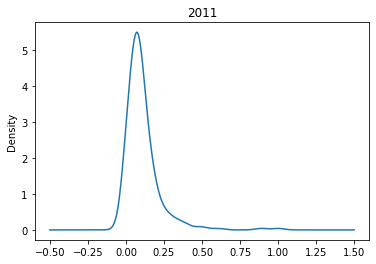

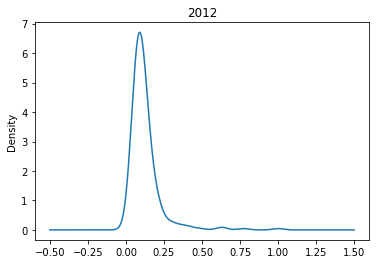

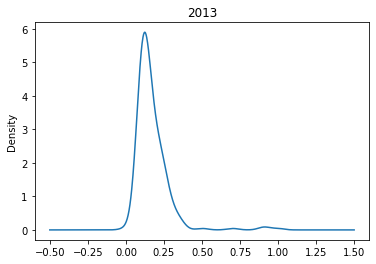

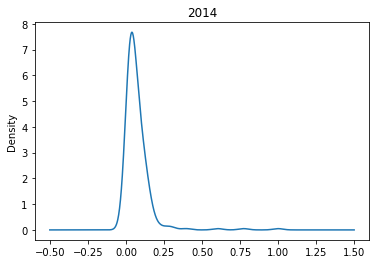

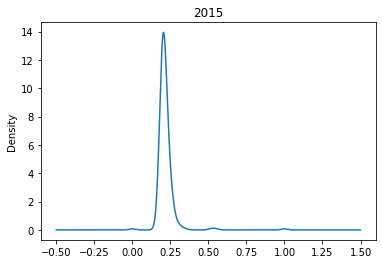

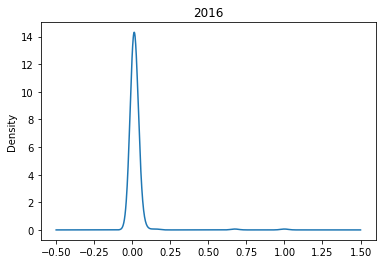

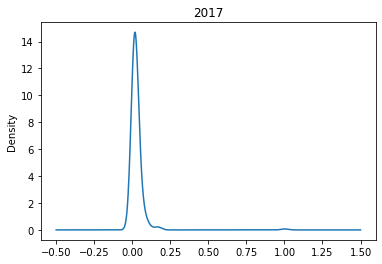

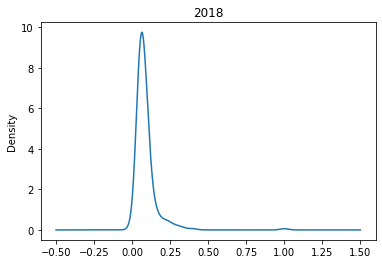

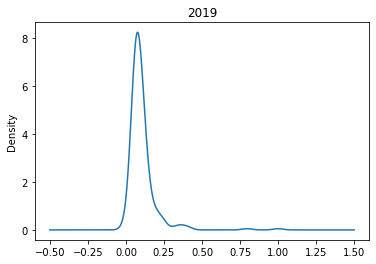

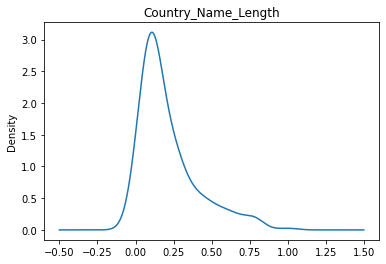

In [ ]:
for column in df1:
  plt.figure(column)
  plt.title(column)

  # numerical variables → histogram
  if column in numerical1:
    df1[column].plot(kind='density')

Volvemos a crear un check point ya que el siguiente paso es el modelado.

In [ ]:
df2 = df1.copy()
df2.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Country_Name_Length
0,0.112729,0.146356,0.028439,0.018133,0.039951,0.012487,0.001197,0.073609,0.07225,0.171465,...,0.087944,0.058995,0.042792,0.030320,0.202117,0.005645,0.002687,0.097429,0.138138,0.038462
1,0.112729,0.146356,0.028439,0.018133,0.039951,0.012487,0.001197,0.073609,0.07225,0.171465,...,0.227569,0.152365,0.259949,0.097102,0.194639,0.019525,0.034390,0.052050,0.102084,0.269231
2,0.112729,0.146356,0.028439,0.018133,0.039951,0.012487,0.001197,0.073609,0.07225,0.171465,...,0.258863,0.213983,0.290929,0.138033,0.259200,0.088234,0.165695,0.339499,0.374619,0.076923
3,0.112729,0.146356,0.028439,0.018133,0.039951,0.012487,0.001197,0.073609,0.07225,0.171465,...,0.071401,0.081545,0.138702,0.049234,0.211469,0.011408,0.018606,0.073256,0.085648,0.115385
4,0.112729,0.146356,0.028439,0.018133,0.039951,0.012487,0.001197,0.073609,0.07225,0.171465,...,0.071401,0.081545,0.138702,0.049234,0.211469,0.011408,0.018606,0.073256,0.085648,0.115385


# 5.Modelado: kmeans.

Para el modelado decisdimos usar kmeans. Con kmeans podemos crear clusters que nos ayudara a obtener grupos a partir de la información que le damos.

En esta línea importamos kmeans y también obtenemos matplolib para poder hacer gráficas de nuestra info.

In [ ]:
from sklearn.cluster import KMeans

%matplotlib inline

Ya que no conocemos cuantos clusters vamos a necesitar para este modelo tenemos que hacer un método extra para obtener el número de clusters optimos para el modelo. En esta linea creamos un arreglo en donde vamos a almacenar los valores de los closter, los cuales se optienen con el método llamado codo de Jambú. 

In [ ]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=1000);
    kmeans.fit(df2);
    wcss.append(kmeans.inertia_);

Aqui podremos ver el comportamiento que tiene el codo de jambú y de esta forma podremos obtener cual va a ser el mejor múmero de clusters.

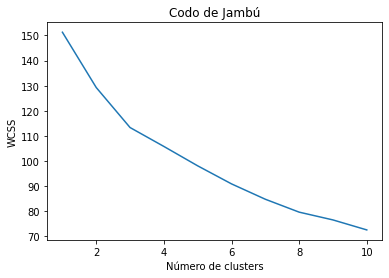

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title("Codo de Jambú")
plt.xlabel("Número de clusters")
plt.ylabel("WCSS")
plt.show()

Para este modelo, nosotros escogimos 2 clusters.

In [ ]:
clustering = KMeans(n_clusters=2, max_iter=300)
clustering.fit(df2)

KMeans(n_clusters=2)

Añadimos los valores del cluster al dataframe df2 como una columna nueva.

In [ ]:
df2["KMeans_Clusters"] = clustering.labels_
df2.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,Country_Name_Length,KMeans_Clusters
0,0.112729,0.146356,0.028439,0.018133,0.039951,0.012487,0.001197,0.073609,0.07225,0.171465,...,0.058995,0.042792,0.030320,0.202117,0.005645,0.002687,0.097429,0.138138,0.038462,1
1,0.112729,0.146356,0.028439,0.018133,0.039951,0.012487,0.001197,0.073609,0.07225,0.171465,...,0.152365,0.259949,0.097102,0.194639,0.019525,0.034390,0.052050,0.102084,0.269231,1
2,0.112729,0.146356,0.028439,0.018133,0.039951,0.012487,0.001197,0.073609,0.07225,0.171465,...,0.213983,0.290929,0.138033,0.259200,0.088234,0.165695,0.339499,0.374619,0.076923,0
3,0.112729,0.146356,0.028439,0.018133,0.039951,0.012487,0.001197,0.073609,0.07225,0.171465,...,0.081545,0.138702,0.049234,0.211469,0.011408,0.018606,0.073256,0.085648,0.115385,1
4,0.112729,0.146356,0.028439,0.018133,0.039951,0.012487,0.001197,0.073609,0.07225,0.171465,...,0.081545,0.138702,0.049234,0.211469,0.011408,0.018606,0.073256,0.085648,0.115385,1


Usando PCA (Principal Component Analysis) hacemos que todo nuestro conjunto de datos pueda ser representado en dos columnas. De esta manera podemos ver de mejor manera la información y tendremos menos problemas al momento de realizar un análisis. 

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_frame = pca.fit_transform(df2)
pca_frame_df = pd.DataFrame(data = pca_frame, columns=['Componente_1', 'Componente_2'])
pca_nombres = pd.concat([pca_frame_df, df2[['KMeans_Clusters']]], axis=1)

pca_nombres

,Componente_1,Componente_2,KMeans_Clusters
0,-0.327046,-0.072576,1
1,-0.202924,-0.298166,1
2,1.289792,-1.238527,0
3,-0.317284,-0.088810,1
4,-0.317284,-0.088810,1
...,...,...,...
238,-0.091021,0.199509,1
239,-0.072881,-0.445164,1
240,-0.053441,0.166451,1
241,0.782258,-0.553275,0


Por último, procedemos a gráficar el modelo usando PCA, de esta manera podemos ver los grupos en los que se separa el modelo.

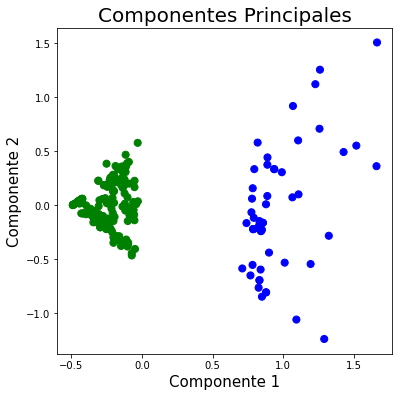

In [ ]:
fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Componente 1', fontsize = 15)
ax.set_ylabel('Componente 2', fontsize = 15)
ax.set_title('Componentes Principales', fontsize=20)

color_theme = np.array(["blue", "green", "orange"])
ax.scatter(x = pca_nombres.Componente_1, y = pca_nombres.Componente_2,
           c = color_theme[pca_nombres.KMeans_Clusters], s = 50)

**Conclusión**

Una vez que hemos realizado nuestro medelo planteado, gracias al codo de Jambú decidimos el número de clusters, es notoria la diferencia de dispersión de ambos grupos. 
A simple vista si le dieramos un centoride a ambos grupos, sería relativamente más sencillo encontrarlo en el grupo verde.
